In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(fashion_mnist.load_data())

In [ ]:
print(train_images)

In [ ]:
print(train_labels)

In [ ]:
print(test_images)

In [ ]:
print(test_labels)

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images[0,23,23])

194


In [ ]:
print(train_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

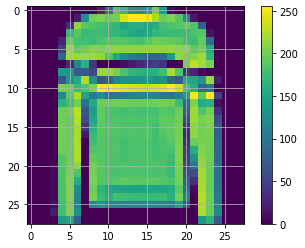

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# print(train_images)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0779 - accuracy: 0.5960
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0651 - accuracy: 0.6017
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0522 - accuracy: 0.6058
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0403 - accuracy: 0.6073
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0287 - accuracy: 0.6135
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0175 - accuracy: 0.6167
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0069 - accuracy: 0.6190
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9960 - accuracy: 0.6222
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9862 - accuracy: 0.6264
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.976

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print(test_acc)
print(test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.9775 - accuracy: 0.6341
0.6341000199317932
0.9775134921073914


In [ ]:
predictions = model.predict(test_images)

In [ ]:
print(np.argmax(predictions[0]))

7


In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")



Pick a number: 6


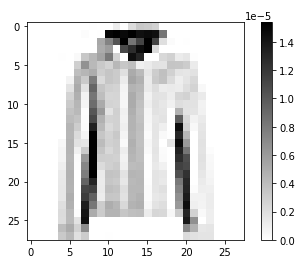

In [ ]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)